<a href="https://colab.research.google.com/github/Segrey372017/gb_ML_in_business/blob/main/ssmirnov_ml_business_tp_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, log_loss

In [3]:
import requests

import urllib.request
import json 

In [4]:
def get_bmi(weight, height):
    """
    Возвращает значение Индекса массы тела, рассчитываемый по формуле вес человека (кг)
    деленный на рост (в метрах) в квадрате 
    """
    return weight / height**2

def get_age_group(age):
    """
    По заданному значению возраста возращает 
    номер возрастной группы по 13 ранговой группировке
    """
    age_groups = {1:[18, 19, 20, 21, 22, 23, 24], #словарь с группами возрастов
                  2:[25, 26, 27, 28, 29],
                  3:[30, 31, 32, 33, 34],
                  4:[35, 36, 37, 38, 39],
                  5:[40, 41, 42, 43, 44],
                  6:[45, 46, 47, 48, 49],
                  7:[50, 51, 52, 53, 54],
                  8:[55, 56, 57, 58, 59],
                  9:[60, 61, 62, 63, 64],
                  10:[65, 66, 67, 68, 69],
                  11:[70, 71, 72, 73, 74],
                  12:[75, 76, 77, 78, 79],
                  13:[80, 81, 82, 83, 84]}

    #Выполним подгонку полученного возраста если меньше 18, то будет 18, если больше 84, ставим 84
    if age < 18:
        age = 18
    elif age > 84:
        age = 84
    
    for group in age_groups.keys(): # итерируемся по группам словаря
        if age in age_groups[group]:
            return group

    return

#Итоговый проект курса "Машинное обучение в бизнесе"
<h3> (клиентская часть)</h3>

### Задание 3
<p> Реализовать ноутбук с клиентом</p>

In [5]:
# загрузим тестовый набор данных
X_test = pd.read_csv('https://raw.githubusercontent.com/Segrey372017/gb_ML_in_business/main/tp_x_test.csv')
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,Sex,Age
0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,9.0
1,0.0,0.0,1.0,21.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
2,1.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
3,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,7.0
4,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,9.0


In [6]:
y_test = pd.read_csv('https://raw.githubusercontent.com/Segrey372017/gb_ML_in_business/main/tp_y_test.csv')
y_test.head()

,Diabetes_012
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [7]:
feats_cols = list(X_test.columns) # колонки с признаками
feats_cols

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'Sex',
 'Age']

In [19]:
# функция для построения запроса к серверу
def send_json(x):
    body  = dict()

    for key in x.keys():
        body[key] = x[key]
        
    print(body)

    myurl = 'http://eb85-34-91-252-59.ngrok.io' + '/predict' # адрес сайта приходится менять каждый запуск сервера
    headers = {'content-type': 'application/json; charset=utf-8'}
   
    response = requests.post(myurl, json= body, headers=headers) # запрос на сервер
    print('Ответ от сервеа', response)
    return response.json()



In [9]:
t_data = dict()
for col in feats_cols:
    t_data[col] = ""

In [10]:
t_data

{'Age': '',
 'BMI': '',
 'CholCheck': '',
 'Fruits': '',
 'HeartDiseaseorAttack': '',
 'HighBP': '',
 'HighChol': '',
 'HvyAlcoholConsump': '',
 'PhysActivity': '',
 'Sex': '',
 'Smoker': '',
 'Stroke': '',
 'Veggies': ''}

In [11]:
t_data = {'Age': get_age_group(37), # заполним структуру проверочными данными
 'BMI': get_bmi(95, 185/100),
 'CholCheck': 1,
 'Fruits': 0,
 'HeartDiseaseorAttack': 0,
 'HighBP': 1,
 'HighChol': 0,
 'HvyAlcoholConsump': 0,
 'PhysActivity': 1,
 'Sex': 1,
 'Smoker': 0,
 'Stroke': 0,
 'Veggies': 1}

In [12]:
t_data

{'Age': 4,
 'BMI': 27.757487216946675,
 'CholCheck': 1,
 'Fruits': 0,
 'HeartDiseaseorAttack': 0,
 'HighBP': 1,
 'HighChol': 0,
 'HvyAlcoholConsump': 0,
 'PhysActivity': 1,
 'Sex': 1,
 'Smoker': 0,
 'Stroke': 0,
 'Veggies': 1}

In [20]:
response = send_json(x = t_data)
response

{'Age': 4, 'BMI': 27.757487216946675, 'CholCheck': 1, 'Fruits': 0, 'HeartDiseaseorAttack': 0, 'HighBP': 1, 'HighChol': 0, 'HvyAlcoholConsump': 0, 'PhysActivity': 1, 'Sex': 1, 'Smoker': 0, 'Stroke': 0, 'Veggies': 1}
Ответ от сервеа <Response [200]>


{'OK': True, 'proba': 0.03668778752920068, 'treshold': 0.42}

In [21]:
# функция для интерпритации результата
def decision(response):
    """
    интерпретирует результат, полученный от сервера

    """
    try :
        if response['OK']:
            if response['proba'] > response['treshold']:
                return 1
            else:
                return 0
    except e :
        print('Ошибка:', e)
    return


In [31]:
if decision(response) == 1:
    print('Есть риск развития диабета')
else :
    print('Развитие диабета маловероятно')

Развитие диабета маловероятно


### Направление массовых запросов

In [25]:
y_pred = list()

In [22]:
N = 50 # выполним предсказания по 50 первым экземплярам тестового набора

In [26]:
%%time
for i in range(N):
    resp = send_json(dict(X_test.iloc[i,:])) # отдаем на сервер экземпляр из тестового набора
    y_pred.append(decision(resp))

{'HighBP': 1.0, 'HighChol': 0.0, 'CholCheck': 1.0, 'BMI': 30.0, 'Smoker': 1.0, 'Stroke': 0.0, 'HeartDiseaseorAttack': 0.0, 'PhysActivity': 1.0, 'Fruits': 1.0, 'Veggies': 1.0, 'HvyAlcoholConsump': 0.0, 'Sex': 0.0, 'Age': 9.0}
Ответ от сервеа <Response [200]>
{'HighBP': 0.0, 'HighChol': 0.0, 'CholCheck': 1.0, 'BMI': 21.0, 'Smoker': 1.0, 'Stroke': 0.0, 'HeartDiseaseorAttack': 0.0, 'PhysActivity': 0.0, 'Fruits': 1.0, 'Veggies': 1.0, 'HvyAlcoholConsump': 0.0, 'Sex': 0.0, 'Age': 3.0}
Ответ от сервеа <Response [200]>
{'HighBP': 1.0, 'HighChol': 0.0, 'CholCheck': 1.0, 'BMI': 29.0, 'Smoker': 0.0, 'Stroke': 0.0, 'HeartDiseaseorAttack': 0.0, 'PhysActivity': 0.0, 'Fruits': 0.0, 'Veggies': 1.0, 'HvyAlcoholConsump': 0.0, 'Sex': 1.0, 'Age': 8.0}
Ответ от сервеа <Response [200]>
{'HighBP': 0.0, 'HighChol': 0.0, 'CholCheck': 1.0, 'BMI': 22.0, 'Smoker': 0.0, 'Stroke': 0.0, 'HeartDiseaseorAttack': 0.0, 'PhysActivity': 1.0, 'Fruits': 1.0, 'Veggies': 1.0, 'HvyAlcoholConsump': 1.0, 'Sex': 0.0, 'Age': 7.0}
О

In [30]:
print(classification_report(y_test[:N], y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        42
         1.0       1.00      0.25      0.40         8

    accuracy                           0.88        50
   macro avg       0.94      0.62      0.67        50
weighted avg       0.90      0.88      0.85        50



In [32]:
# Функциюя для отрисовки матрицы соответсвия
def show_matrix(y_true, y_pred, classes, title):
    """
    Отрисовка матрицы соответсвия средствами seaborn

    """
    plt.title(title)
    cnf = confusion_matrix(y_true, y_pred)
    
    sns.heatmap(cnf, cmap = 'Blues', annot = True, fmt = ".1f", linecolor= 'black',
                linewidths= 1, xticklabels= classes, yticklabels= classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    
    plt.figure(figsize = (8,8))
    plt.show()

    return

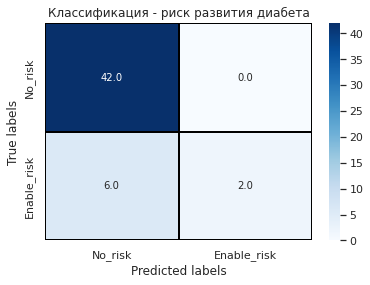

<Figure size 576x576 with 0 Axes>

In [34]:
show_matrix(y_test[:N], y_pred, classes = ['No_risk', 'Enable_risk'], title = 'Классификация - риск развития диабета')

Вроде функционирует и таже есть положительные результаты, к сожалению модель пробускает значительные число людей с риском диабета